In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 22.6 MB/s eta 0:00:00


## Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
import os

## Dataset Paths

In [4]:
train_path = '/content/drive/MyDrive/YOLO_Classification_Datasets/train'
val_path = '/content/drive/MyDrive/YOLO_Classification_Datasets/val'
yaml_path = '/content/drive/MyDrive/YOLO_Classification_Datasets/config.yaml'

In [5]:
def count_files(dataset_path):
    image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
    text_files = [f for f in os.listdir(dataset_path) if f.endswith('.txt')]
    return len(image_files), len(text_files)


train_image_count, train_label_count = count_files(train_path)

val_image_count, val_label_count = count_files(val_path)

print(f"Training Dataset - Images: {train_image_count}, Text files: {train_label_count}")
print(f"Validation Dataset - Images: {val_image_count}, Text files: {val_label_count}")

Training Dataset - Images: 427, Text files: 427
Validation Dataset - Images: 61, Text files: 61


In [6]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Model Training

In [9]:
model = YOLO('/content/drive/MyDrive/YOLO_Classification_Datasets/last_checkpoint.pt')  # Replace with the correct path to your checkpoint file

# Resume training
results = model.train(
    data=yaml_path,        # Path to your dataset YAML file
    epochs=200,            # Total epochs to train
    imgsz=640,             # Input image size
    batch=16,              # Batch size
    patience=20,           # Early stopping patience set to 20
    device=0               # Use GPU (0) or CPU (-1)
)

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YOLO_Classification_Datasets/last_checkpoint.pt, data=/content/drive/MyDrive/YOLO_Classification_Datasets/config.yaml, epochs=200, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, 

100%|██████████| 5.35M/5.35M [00:00<00:00, 99.1MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/YOLO_Classification_Datasets/train.cache... 427 images, 0 backgrounds, 18 corrupt: 100%|██████████| 427/427 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/YOLO_Classification_Datasets/train/42542E1A-DEFB-42FC-AA99-446A9FE275CA.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/YOLO_Classification_Datasets/train/ALBANY-CREEK_CS4516_Katie-Betteridge_2024-05-16_Photo-on-exit-CFOS-Fridges_174.jpg: ignoring corrupt image/label: Label class 16 exceeds dataset class count 3. Possible class labels are 0-2
train: WARNING ⚠️ /content/drive/MyDrive/YOLO_Classification_Datasets/train/BENOWA-VILLAGE_CS4390_Glenda-Mullenger_2024-05-15_Photo-on-exit-CFOS-Fridges_311.jpg: ignoring corrupt image/label: Label class 16 exceeds dataset class count 3. Possible class labels are 0-2
train: WARNING ⚠️ /content/drive/MyDrive/YOLO_Classification_Datasets/train/Berwick-South_CS544_Michelle-O-Brien_2024-05-17_Photo-on-exit-CFOS-Fridges_35.jpg: ignoring corrupt image/label: Label class 16 exceeds dataset class count 3. Possible class labels are 0-2
train: WARNING ⚠️ /content/drive/MyDrive/YOLO_Classifica

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/YOLO_Classification_Datasets/val.cache... 61 images, 0 backgrounds, 2 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/YOLO_Classification_Datasets/val/SCHOFIELDS_CS7572_Ethan-Somerville_2024-05-16_Photo-on-exit-CFOS-Fridges_114.jpg: ignoring corrupt image/label: Label class 16 exceeds dataset class count 3. Possible class labels are 0-2
val: WARNING ⚠️ /content/drive/MyDrive/YOLO_Classification_Datasets/val/SPRINGWOOD_CS4472_Joanne-McCormack_2024-05-15_Photo-on-exit-CFOS-Fridges_284.jpg: ignoring corrupt image/label: Label class 16 exceeds dataset class count 3. Possible class labels are 0-2


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      10.3G     0.7132     0.3979     0.9067       1273        640: 100%|██████████| 26/26 [02:17<00:00,  5.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all         59       4424      0.943      0.839      0.909       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      12.3G     0.7003     0.3842     0.8982       1075        640: 100%|██████████| 26/26 [00:35<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all         59       4424      0.937      0.833      0.897      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      12.8G     0.7133     0.3941     0.9003       1423        640: 100%|██████████| 26/26 [00:37<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         59       4424       0.89      0.869      0.901      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      10.3G     0.7399     0.4158     0.9147        762        640: 100%|██████████| 26/26 [00:38<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         59       4424       0.86      0.865      0.878      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      8.94G     0.7429     0.4167     0.9083       1391        640: 100%|██████████| 26/26 [00:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         59       4424       0.87      0.866      0.875      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      10.1G     0.7489     0.4177     0.9117       1342        640: 100%|██████████| 26/26 [00:33<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all         59       4424      0.956      0.872      0.919      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200        13G     0.7374     0.4021     0.9039        978        640: 100%|██████████| 26/26 [00:39<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         59       4424      0.914      0.866      0.923      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      10.2G       0.75     0.4073      0.908       1427        640: 100%|██████████| 26/26 [00:36<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         59       4424      0.929      0.854      0.906      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      8.41G     0.7185     0.3915     0.9023       1273        640: 100%|██████████| 26/26 [00:36<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         59       4424      0.947      0.853      0.915      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      11.3G     0.7203     0.3956     0.9032       1401        640: 100%|██████████| 26/26 [00:32<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all         59       4424      0.887      0.866      0.907       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      10.2G     0.6941     0.3836     0.8952        984        640: 100%|██████████| 26/26 [00:43<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         59       4424      0.921      0.875      0.921      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      9.51G     0.6978     0.3789     0.8976       1881        640: 100%|██████████| 26/26 [00:37<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         59       4424      0.928      0.871      0.922      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      10.1G     0.7133      0.383     0.8976       1067        640: 100%|██████████| 26/26 [00:35<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         59       4424       0.91      0.853      0.905      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      11.1G     0.7378     0.3943        0.9       1053        640: 100%|██████████| 26/26 [00:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all         59       4424      0.892      0.894      0.919      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      10.7G     0.6986     0.3746     0.8908       1211        640: 100%|██████████| 26/26 [00:34<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         59       4424      0.904      0.874      0.918       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      9.81G     0.6905     0.3739     0.8945       1384        640: 100%|██████████| 26/26 [00:36<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         59       4424      0.907      0.886       0.93      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      9.94G     0.7237     0.3905     0.8966       1514        640: 100%|██████████| 26/26 [00:37<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         59       4424      0.925      0.893      0.935      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      10.9G     0.7314     0.3967     0.9027        933        640: 100%|██████████| 26/26 [00:41<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all         59       4424      0.888      0.876      0.904      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      9.78G     0.7012     0.3828     0.8943        901        640: 100%|██████████| 26/26 [00:36<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         59       4424      0.949      0.861      0.925      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      9.06G      0.687     0.3729     0.8926       1491        640: 100%|██████████| 26/26 [00:37<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         59       4424      0.889      0.856      0.896      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      10.1G     0.6922     0.3737     0.8962       1266        640: 100%|██████████| 26/26 [00:34<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all         59       4424      0.882      0.876      0.902      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      8.83G     0.6908     0.3701     0.8922       1199        640: 100%|██████████| 26/26 [00:38<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all         59       4424      0.915      0.874       0.92       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      11.2G     0.7031     0.3763     0.8906       1291        640: 100%|██████████| 26/26 [00:36<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         59       4424      0.944      0.866      0.919      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      9.27G     0.6765     0.3624      0.887       1302        640: 100%|██████████| 26/26 [00:36<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         59       4424      0.895       0.88      0.909      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      9.88G     0.6946     0.3711     0.8896       1014        640: 100%|██████████| 26/26 [00:41<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         59       4424      0.925      0.887      0.929      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      10.3G       0.69     0.3708     0.8889       1136        640: 100%|██████████| 26/26 [00:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all         59       4424      0.903      0.887      0.912      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      9.64G     0.6663     0.3561      0.882       1491        640: 100%|██████████| 26/26 [00:36<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         59       4424      0.899      0.879       0.91      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      9.82G     0.6853     0.3654     0.8932        873        640: 100%|██████████| 26/26 [00:38<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         59       4424      0.915      0.864       0.92      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      9.22G     0.6681     0.3564     0.8899       1623        640: 100%|██████████| 26/26 [00:36<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         59       4424      0.889      0.851      0.884      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      9.34G     0.6685     0.3578     0.8853       1300        640: 100%|██████████| 26/26 [00:34<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all         59       4424      0.919      0.852      0.915      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      8.42G     0.6961     0.3708     0.8916       1117        640: 100%|██████████| 26/26 [00:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all         59       4424        0.9      0.854      0.894      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      8.73G     0.6893      0.365     0.8906       1217        640: 100%|██████████| 26/26 [00:41<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         59       4424      0.939      0.848      0.909      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      9.99G     0.6919     0.3652     0.8887       1541        640: 100%|██████████| 26/26 [00:38<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         59       4424      0.907      0.852      0.906      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      11.3G     0.6926     0.3619     0.8848       1085        640: 100%|██████████| 26/26 [00:37<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all         59       4424      0.929      0.862      0.914      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200       9.2G     0.6836     0.3611     0.8901       1212        640: 100%|██████████| 26/26 [00:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all         59       4424      0.914      0.858        0.9      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      10.2G     0.6649     0.3548     0.8791       1076        640: 100%|██████████| 26/26 [00:36<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         59       4424      0.931      0.875      0.915       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      9.29G      0.671     0.3524     0.8833       1157        640: 100%|██████████| 26/26 [00:37<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         59       4424      0.901       0.88      0.914       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      9.81G     0.6703     0.3552     0.8788       1267        640: 100%|██████████| 26/26 [00:36<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         59       4424      0.924      0.879       0.92      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      10.3G     0.6631     0.3491     0.8826       1002        640: 100%|██████████| 26/26 [00:39<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all         59       4424      0.948       0.86      0.919      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      8.86G     0.6691     0.3519     0.8813       1249        640: 100%|██████████| 26/26 [00:35<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all         59       4424      0.875       0.87        0.9      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      9.27G     0.6531     0.3493     0.8806       1361        640: 100%|██████████| 26/26 [00:35<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         59       4424      0.893      0.882      0.898      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      10.6G      0.667     0.3527     0.8817       1081        640: 100%|██████████| 26/26 [00:36<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         59       4424      0.904      0.882       0.93      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      8.66G      0.665     0.3524     0.8846        880        640: 100%|██████████| 26/26 [00:36<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         59       4424      0.892      0.866      0.897      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      10.4G     0.6671     0.3563     0.8817       1265        640: 100%|██████████| 26/26 [00:35<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all         59       4424      0.927       0.87      0.918      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      9.29G     0.6714     0.3502     0.8882        976        640: 100%|██████████| 26/26 [00:33<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all         59       4424      0.911      0.848      0.907      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      12.4G     0.6831     0.3593     0.8834       1387        640: 100%|██████████| 26/26 [00:35<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         59       4424      0.911      0.882      0.895      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      9.44G     0.6633     0.3492     0.8838       1170        640: 100%|██████████| 26/26 [00:39<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         59       4424      0.932      0.873       0.92       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      11.3G      0.664     0.3487     0.8804       1142        640: 100%|██████████| 26/26 [00:34<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         59       4424      0.915      0.866      0.909      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      10.4G     0.6714      0.354     0.8812       1562        640: 100%|██████████| 26/26 [00:34<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         59       4424      0.904      0.861      0.892      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      11.7G     0.6577     0.3526     0.8786       1162        640: 100%|██████████| 26/26 [00:35<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all         59       4424      0.915      0.857      0.905      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      9.74G     0.6599     0.3485     0.8744        968        640: 100%|██████████| 26/26 [00:38<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         59       4424      0.885      0.884      0.897      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      9.12G     0.6585     0.3437     0.8777       1094        640: 100%|██████████| 26/26 [00:38<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         59       4424      0.907       0.87        0.9      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      9.41G     0.6574     0.3467     0.8818        954        640: 100%|██████████| 26/26 [00:35<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         59       4424      0.917      0.873      0.907      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      11.7G     0.6639     0.3456     0.8792       1237        640: 100%|██████████| 26/26 [00:41<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         59       4424      0.931       0.87      0.915      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      10.9G     0.6549     0.3428     0.8775       1212        640: 100%|██████████| 26/26 [00:36<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         59       4424      0.911      0.865      0.915      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      10.8G     0.6407     0.3359     0.8743       1150        640: 100%|██████████| 26/26 [00:37<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         59       4424      0.918      0.872      0.907      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      9.77G     0.6423     0.3352     0.8709       1541        640: 100%|██████████| 26/26 [00:36<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all         59       4424      0.889      0.871      0.889      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      9.31G     0.6364     0.3339     0.8676        884        640: 100%|██████████| 26/26 [00:35<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all         59       4424      0.911       0.89      0.918      0.729
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 38, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



58 epochs completed in 0.731 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]


                   all         59       4424      0.924      0.879       0.92      0.731
                object         44       3275      0.957      0.969      0.987      0.856
                 shelf         59        982      0.934      0.914      0.965      0.763
                  deep         37        167       0.88      0.754       0.81      0.575
Speed: 0.2ms preprocess, 9.4ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train


## Saving Trained Model

In [10]:
import shutil

best_model_source = results.save_dir / "weights/best.pt"
last_checkpoint_source = results.save_dir / "weights/last.pt"

best_model_path = "/content/drive/MyDrive/YOLO_Classification_Datasets/best_model2.pt"
last_checkpoint_path = "/content/drive/MyDrive/YOLO_Classification_Datasets/last_checkpoint2.pt"

# Copy the best model and last checkpoint to Google Drive
shutil.copy(best_model_source, best_model_path)
shutil.copy(last_checkpoint_source, last_checkpoint_path)

print(f"Best model permanently saved at: {best_model_path}")
print(f"Last checkpoint permanently saved at: {last_checkpoint_path}")


Best model permanently saved at: /content/drive/MyDrive/YOLO_Classification_Datasets/best_model2.pt
Last checkpoint permanently saved at: /content/drive/MyDrive/YOLO_Classification_Datasets/last_checkpoint2.pt


In [11]:
best_model_path = results.save_dir / "best.pt"
print(f"Best model saved at: {best_model_path}")

Best model saved at: runs/detect/train/best.pt


## Model Validation

In [12]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/YOLO_Classification_Datasets/best_model2.pt')

results = model.val(
    data=yaml_path,
    batch=16,
    imgsz=640
)

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/MyDrive/YOLO_Classification_Datasets/val.cache... 61 images, 0 backgrounds, 2 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/YOLO_Classification_Datasets/val/SCHOFIELDS_CS7572_Ethan-Somerville_2024-05-16_Photo-on-exit-CFOS-Fridges_114.jpg: ignoring corrupt image/label: Label class 16 exceeds dataset class count 3. Possible class labels are 0-2
val: WARNING ⚠️ /content/drive/MyDrive/YOLO_Classification_Datasets/val/SPRINGWOOD_CS4472_Joanne-McCormack_2024-05-15_Photo-on-exit-CFOS-Fridges_284.jpg: ignoring corrupt image/label: Label class 16 exceeds dataset class count 3. Possible class labels are 0-2



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.82s/it]


                   all         59       4424      0.924      0.879       0.92      0.733
                object         44       3275      0.957      0.968      0.986      0.858
                 shelf         59        982      0.934      0.913      0.964      0.764
                  deep         37        167      0.879      0.754       0.81      0.578
Speed: 0.5ms preprocess, 30.9ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to runs/detect/val2


## Evaluation Metrics

In [13]:
mean_results = results.mean_results()

print("Evaluation Metrics:")
print(f"Precision: {mean_results[0]:.4f}")
print(f"Recall: {mean_results[1]:.4f}")
print(f"mAP50: {mean_results[2]:.4f}")
print(f"mAP50-95: {mean_results[3]:.4f}")

Evaluation Metrics:
Precision: 0.9235
Recall: 0.8786
mAP50: 0.9203
mAP50-95: 0.7331


## Inference Pipeline

Found 20 images in /content/drive/MyDrive/YOLO_Classification_Datasets/val, processing the first 20...
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/9effc100-4dae-4db6-b80e-7ecb92e56926.jpg...

0: 640x480 98 objects, 6 shelfs, 28.4ms
Speed: 5.7ms preprocess, 28.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


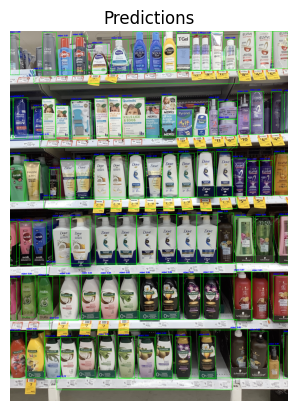

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/9effc100-4dae-4db6-b80e-7ecb92e56926_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/4122a1fe-f805-4374-8154-fb38a87e09db.jpg...

0: 640x480 104 objects, 7 shelfs, 1 deep, 27.9ms
Speed: 4.9ms preprocess, 27.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


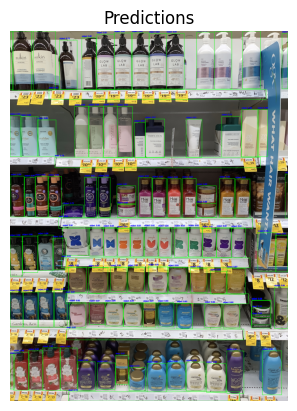

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/4122a1fe-f805-4374-8154-fb38a87e09db_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/2d3563b9-bfb3-4f3d-a15b-6475a8cf16e1.jpg...

0: 640x480 82 objects, 5 shelfs, 1 deep, 27.8ms
Speed: 4.5ms preprocess, 27.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


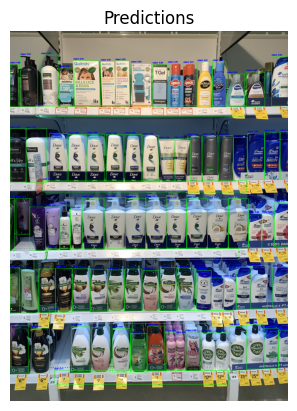

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/2d3563b9-bfb3-4f3d-a15b-6475a8cf16e1_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/9040a478-c649-493a-a284-b0e8eb2d1f0b.jpg...

0: 640x480 121 objects, 8 shelfs, 1 deep, 27.8ms
Speed: 4.1ms preprocess, 27.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


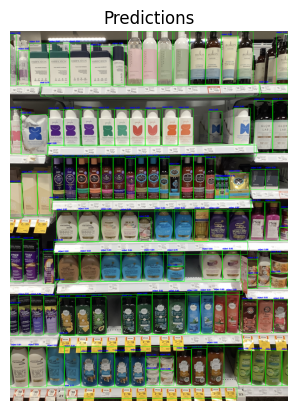

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/9040a478-c649-493a-a284-b0e8eb2d1f0b_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/ca285b10-dd5a-41b5-aecf-3457879ee5b4.jpg...

0: 640x480 110 objects, 7 shelfs, 27.8ms
Speed: 4.3ms preprocess, 27.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


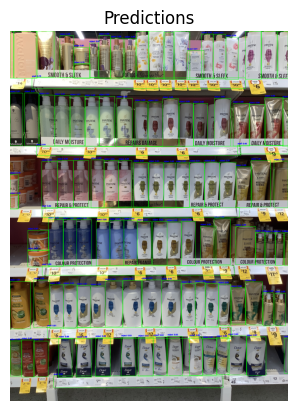

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/ca285b10-dd5a-41b5-aecf-3457879ee5b4_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/SCHOFIELDS_CS7572_Ethan-Somerville_2024-05-16_Photo-on-exit-CFOS-Fridges_114.jpg...

0: 640x480 22 shelfs, 5 deeps, 27.9ms
Speed: 6.2ms preprocess, 27.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


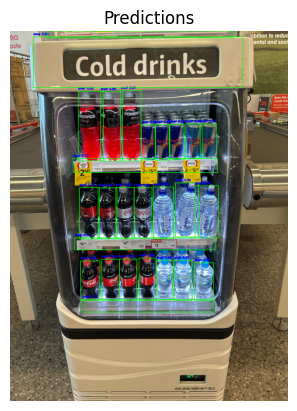

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/SCHOFIELDS_CS7572_Ethan-Somerville_2024-05-16_Photo-on-exit-CFOS-Fridges_114_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/05a4117d-8d20-4be1-a87c-d93f00ade1ef.jpg...

0: 640x480 117 objects, 7 shelfs, 27.9ms
Speed: 5.3ms preprocess, 27.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


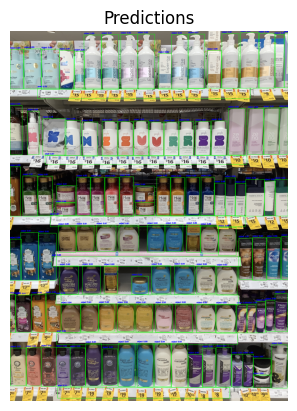

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/05a4117d-8d20-4be1-a87c-d93f00ade1ef_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/071fd333-be62-4433-b51b-4ecd80c444a5.jpg...

0: 640x480 105 objects, 6 shelfs, 27.8ms
Speed: 4.2ms preprocess, 27.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


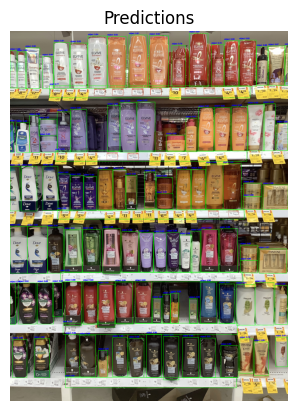

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/071fd333-be62-4433-b51b-4ecd80c444a5_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/SPRINGWOOD_CS4472_Joanne-McCormack_2024-05-15_Photo-on-exit-CFOS-Fridges_284.jpg...

0: 640x480 2 objects, 36 shelfs, 5 deeps, 27.8ms
Speed: 2.7ms preprocess, 27.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


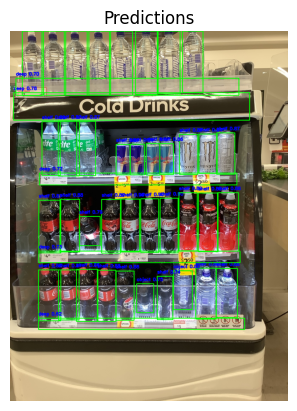

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/SPRINGWOOD_CS4472_Joanne-McCormack_2024-05-15_Photo-on-exit-CFOS-Fridges_284_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/aa92ce97-c016-4221-b43e-faa15eaa96d8.jpg...

0: 640x480 83 objects, 5 shelfs, 27.8ms
Speed: 4.7ms preprocess, 27.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 480)


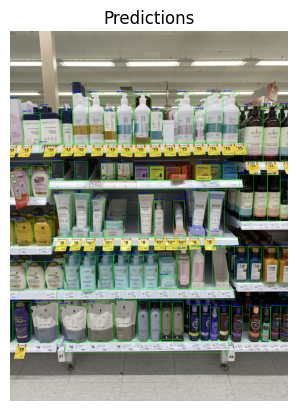

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/aa92ce97-c016-4221-b43e-faa15eaa96d8_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/693980a2-097f-4a5d-b6d6-3d8d9b0a17c1.jpg...

0: 640x480 46 objects, 15 shelfs, 16 deeps, 29.3ms
Speed: 4.4ms preprocess, 29.3ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 480)


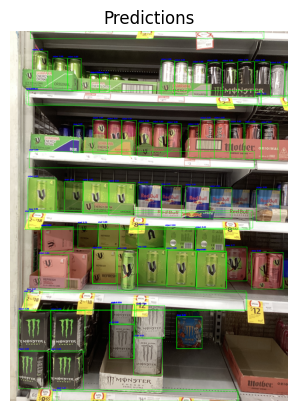

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/693980a2-097f-4a5d-b6d6-3d8d9b0a17c1_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/77d9cb09-52b7-45c7-bfb1-f21f4860ac5e.jpg...

0: 640x480 140 objects, 9 shelfs, 1 deep, 27.8ms
Speed: 4.4ms preprocess, 27.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


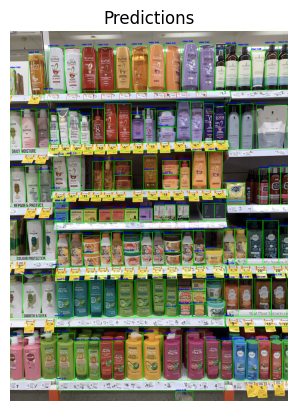

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/77d9cb09-52b7-45c7-bfb1-f21f4860ac5e_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/8a0845ad-59dc-4f98-a34e-923a59bd224a.jpg...

0: 640x480 106 objects, 7 shelfs, 27.8ms
Speed: 4.5ms preprocess, 27.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


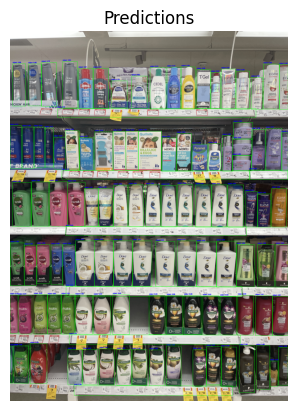

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/8a0845ad-59dc-4f98-a34e-923a59bd224a_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/09f21396-9437-4c1a-b8a8-e06bcd843dd2.jpg...

0: 640x480 99 objects, 7 shelfs, 2 deeps, 27.8ms
Speed: 4.6ms preprocess, 27.8ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 480)


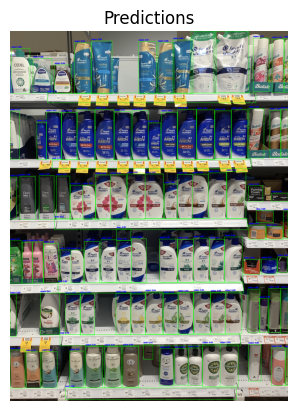

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/09f21396-9437-4c1a-b8a8-e06bcd843dd2_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/118307a2-c2e1-40aa-a052-899da4386c21.jpg...

0: 640x480 101 objects, 6 shelfs, 27.8ms
Speed: 5.7ms preprocess, 27.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


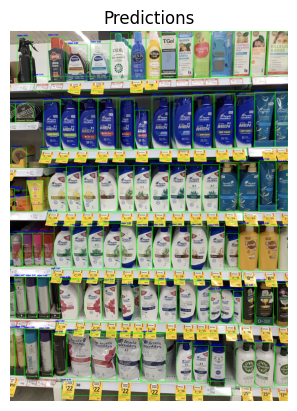

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/118307a2-c2e1-40aa-a052-899da4386c21_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/50ef49b3-7ce6-44d9-902c-992c8e5cb926.jpg...

0: 640x480 104 objects, 6 shelfs, 1 deep, 27.8ms
Speed: 5.2ms preprocess, 27.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


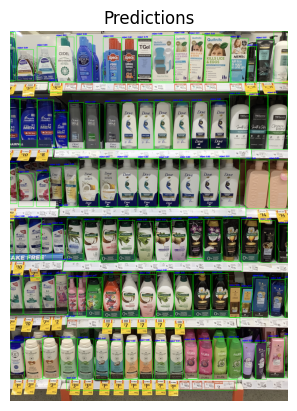

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/50ef49b3-7ce6-44d9-902c-992c8e5cb926_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/4aaebc41-f902-48ae-8f81-5eac8733aac9.jpg...

0: 640x480 129 objects, 7 shelfs, 27.8ms
Speed: 4.3ms preprocess, 27.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


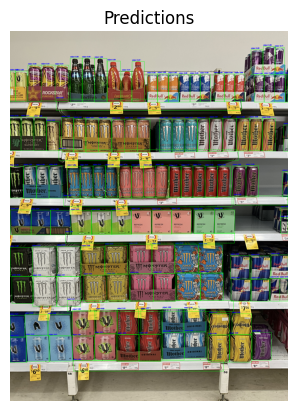

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/4aaebc41-f902-48ae-8f81-5eac8733aac9_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/10145feb-00b1-4152-bb94-8ed1d100918d.jpg...

0: 640x480 101 objects, 6 shelfs, 1 deep, 27.8ms
Speed: 4.4ms preprocess, 27.8ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 480)


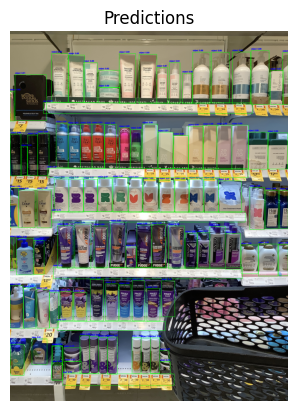

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/10145feb-00b1-4152-bb94-8ed1d100918d_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/344971bc-4a30-4407-8f0f-c40ac6abc140.jpg...

0: 640x480 90 objects, 6 shelfs, 1 deep, 27.8ms
Speed: 5.7ms preprocess, 27.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


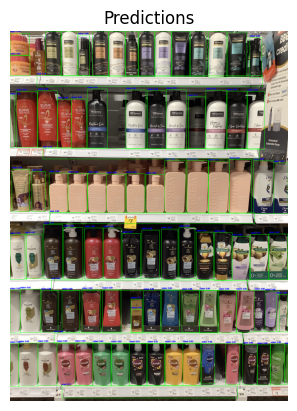

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/344971bc-4a30-4407-8f0f-c40ac6abc140_predicted.jpg
Processing /content/drive/MyDrive/YOLO_Classification_Datasets/val/fb4a3f60-d131-4045-9b24-2ece7de1376b.jpg...

0: 640x480 84 objects, 6 shelfs, 27.8ms
Speed: 4.6ms preprocess, 27.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


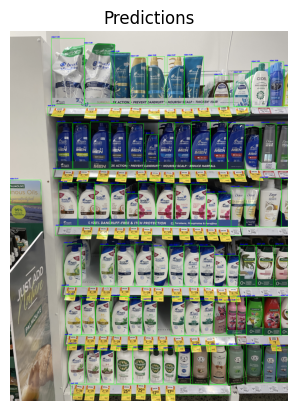

Results saved to /content/drive/MyDrive/YOLO_Classification_Datasets/val/fb4a3f60-d131-4045-9b24-2ece7de1376b_predicted.jpg


In [16]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import glob

# Load the trained model
model = YOLO('/content/drive/MyDrive/YOLO_Classification_Datasets/best_model2.pt')  # Path to your trained model

def run_inference(image_path, conf_threshold=0.25, save_results=False):

    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image not found at {image_path}")
        return

    # Run inference
    results = model.predict(source=image, conf=conf_threshold)

    # Parse results
    predictions = results[0]
    boxes = predictions.boxes.xyxy.cpu().numpy()
    confidences = predictions.boxes.conf.cpu().numpy()
    class_ids = predictions.boxes.cls.cpu().numpy().astype(int)

    # Annotate image with bounding boxes and labels
    for box, conf, class_id in zip(boxes, confidences, class_ids):
        x1, y1, x2, y2 = map(int, box)
        label = f"{model.names[class_id]} {conf:.2f}"
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display results
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Predictions")
    plt.show()

    # Save results
    if save_results:
        result_path = image_path.replace(".jpg", "_predicted.jpg").replace(".png", "_predicted.png")
        cv2.imwrite(result_path, image)
        print(f"Results saved to {result_path}")


def run_inference_on_batch(folder_path, conf_threshold=0.25, save_results=False, num_images=20):

    image_paths = glob.glob(f"{folder_path}/*.[jp][pn]g")  # Matches .jpg, .jpeg, .png files
    if not image_paths:
        print(f"No images found in {folder_path}")
        return

    # Limit to `num_images` images
    image_paths = image_paths[:num_images]  # Only process the first `num_images` images

    print(f"Found {len(image_paths)} images in {folder_path}, processing the first {num_images}...")
    for image_path in image_paths:
        print(f"Processing {image_path}...")
        run_inference(image_path, conf_threshold=conf_threshold, save_results=save_results)


# Run inference on 10 images in a folder
folder_path = "/content/drive/MyDrive/YOLO_Classification_Datasets/val"  # Replace with your folder path
run_inference_on_batch(folder_path, conf_threshold=0.25, save_results=True, num_images=20)
